### Import Statements, Loading Data

In [244]:
import pandas as pd
import numpy as np

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.collocations import *
from wordcloud import WordCloud
from gensim.models import Word2Vec

import string
import re

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
precision_score, confusion_matrix, classification_report, roc_curve, auc, \
average_precision_score

#nltk.download("gutenberg")
#nltk.download("stopwords")

In [ ]:
## eventually want to pull new tweets with Bitcoin tag and use model to classify them as pos or neg,
## then do time series on that

In [97]:
#pip install tweepy

     |████████████████████████████████| 101 kB 2.6 MB/s ta 0:00:011
     |████████████████████████████████| 151 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.2 MB/s eta 0:00:01
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.1.0
    Uninstalling oauthlib-3.1.0:
      Successfully uninstalled oauthlib-3.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0
Note: you may need to restart the kernel to use updated packages.


In [61]:
data = pd.read_csv('bitcoin_tweets1000000.csv', encoding='ISO-8859-1', index_col=[0])
data.head()

/Users/natalyadoris/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,5,6,7,8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0
1,CryptoND,NaN,ð BITCOINLIVE is a Dutch platform aimed at ...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,"ð Today, that's this #Thursday, we will do ...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0
4,Alex Kirchmaier ð¦ð¹ð¸ðª #FactsSupersp...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000025 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_name         999981 non-null   object 
 1   user_location     536681 non-null   object 
 2   user_description  889249 non-null   object 
 3   user_created      1000000 non-null  object 
 4   user_followers    1000000 non-null  object 
 5   user_friends      1000000 non-null  object 
 6   user_favourites   999997 non-null   object 
 7   user_verified     999996 non-null   object 
 8   date              999995 non-null   object 
 9   text              999993 non-null   object 
 10  hashtags          983199 non-null   object 
 11  source            996633 non-null   object 
 12  is_retweet        999946 non-null   object 
 13  cleanText         999987 non-null   object 
 14  Polarity Score    999988 non-null   float64
 15  sentiment         999986 non-null   float64
dtypes: flo

In [63]:
data.shape

(1000025, 16)

In [64]:
data.describe()

,Polarity Score,sentiment
count,999988.000000,999986.000000
mean,0.144692,0.472943
std,0.271044,0.499268
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.286508,1.000000
max,1.000000,1.000000


In [65]:
data.isna().sum()

user_name               44
user_location       463344
user_description    110776
user_created            25
user_followers          25
user_friends            25
user_favourites         28
user_verified           29
date                    30
text                    32
hashtags             16826
source                3392
is_retweet              79
cleanText               38
Polarity Score          37
sentiment               39
dtype: int64

In [66]:
# remove columns we don't need
data = data.drop(columns=['user_created', 'cleanText', 'user_location', 
                          'user_description'])

In [67]:
# dealing with nas

# drop rows where date, text or sentiment is NaN
data = data.dropna(subset=['text', 'date', 'sentiment'])
print(data.shape)
data.isna().sum()

(999986, 12)


user_name             19
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags           16792
source              3357
is_retweet            43
Polarity Score         0
sentiment              0
dtype: int64

In [68]:
# date column needs to be transformed to proper format
import datetime

data['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data['date']]
data.head()

ValueError: time data "['ETH', 'BTC', 'Bitcoin']" does not match format '%Y-%m-%d %H:%M:%S'

In [84]:
# visually inspecting rows with missing date data
display(data[data['date'].str.contains('ETH|BTC|btc')]) 
# these columns are shifted two to the right

# what about all columns with missing source and retween?
data[data['source'].isna() & data['is_retweet'].isna()] 
# the rest of them look normal

,user_name,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Polarity Score,sentiment


,user_name,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Polarity Score,sentiment
228484,DayTradeIdeas,9190,287,2229,False,2021-06-21 12:17:24,#Bitcoin topped exactly at 1st resistance at 3...,NaN,NaN,NaN,0.250000,1.0
240487,DayTradeIdeas,9191,287,2229,False,2021-06-21 05:19:28,#Bitcoin holding 1st resistance at 36700/37700...,NaN,NaN,NaN,0.000000,0.0
316612,Millionaire Box,225,158,229,False,2021-07-03 12:55:52,Get Paid For Your Opinions! Real Survey Jobs -...,NaN,NaN,NaN,0.200000,1.0
378314,Aldrich Baron,5,12,12,False,2021-07-24 15:45:42,@ShikokuBaby This project looks interesting an...,NaN,NaN,NaN,0.433333,1.0
398478,Evan,57,331,727,False,2021-07-23 17:38:35,@mindfulbtcboss The best way to predict the fu...,NaN,NaN,NaN,0.500000,1.0
398690,Evan,57,331,727,False,2021-07-23 17:27:05,@brucefenton @UofNH @UNH_Police @UNHWildcats @...,NaN,NaN,NaN,0.500000,1.0
398713,Evan,57,331,727,False,2021-07-23 17:25:54,@business The best way to predict the future i...,NaN,NaN,NaN,0.500000,1.0
398735,Evan,57,331,727,False,2021-07-23 17:24:34,@Bybit_Official The best way to predict the fu...,NaN,NaN,NaN,0.500000,1.0
398746,Evan,57,331,727,False,2021-07-23 17:23:52,@krakenfx The best way to predict the future i...,NaN,NaN,NaN,0.500000,1.0
398757,Evan,57,331,727,False,2021-07-23 17:23:06,@Cointelegraph The best way to predict the fut...,NaN,NaN,NaN,0.500000,1.0


In [83]:
data = data[~data['date'].str.contains('ETH|BTC|btc')].reset_index(drop=True)

In [102]:
# transforming text data
data['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data['date']]
data['date'] = pd.to_datetime(data['date']).dt.date

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999981 entries, 0 to 999980
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_name        999962 non-null  object        
 1   user_followers   999981 non-null  object        
 2   user_friends     999981 non-null  object        
 3   user_favourites  999981 non-null  object        
 4   user_verified    999981 non-null  object        
 5   date             999981 non-null  datetime64[ns]
 6   text             999981 non-null  object        
 7   hashtags         983189 non-null  object        
 8   source           996629 non-null  object        
 9   is_retweet       999943 non-null  object        
 10  Polarity Score   999981 non-null  float64       
 11  sentiment        999981 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 91.6+ MB


In [92]:
data['is_retweet'][data['is_retweet'].isna()] = 'n/a'

<ipython-input-92-7d0b5dd7c753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_retweet'][data['is_retweet'].isna()] = 'n/a'


In [ ]:
# boolean columns need to be transformed to 0 and 1, can do scikit

In [282]:
display(data['date'].max())
display(data['date'].min())

datetime.date(2021, 8, 21)

datetime.date(2021, 2, 5)

In [109]:
# loading in bitcoin price data from feb 2021 to aug 2021
btc_price = pd.read_csv('BTC-USD.csv')
btc_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,33114.578125,34638.214844,32384.228516,33537.175781,33537.175781,61400400660
1,2021-02-02,33533.199219,35896.882813,33489.218750,35510.289063,35510.289063,63088585433
2,2021-02-03,35510.820313,37480.187500,35443.984375,37472.089844,37472.089844,61166818159
3,2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
4,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402


In [110]:
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       212 non-null    object 
 1   Open       212 non-null    float64
 2   High       212 non-null    float64
 3   Low        212 non-null    float64
 4   Close      212 non-null    float64
 5   Adj Close  212 non-null    float64
 6   Volume     212 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


In [119]:
# converting date to datetime format
btc_price['Date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') \
                     for date in btc_price['Date']]
btc_price['Date'] = pd.to_datetime(btc_price['Date']).dt.date

# dataframe with just date and closing price
price_df = btc_price[['Date', 'Close']]
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    212 non-null    object 
 1   Close   212 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


### Text Preprocessing

In [105]:
text_data = data[['text', 'date', 'sentiment', 'is_retweet']]
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999981 entries, 0 to 999980
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        999981 non-null  object 
 1   date        999981 non-null  object 
 2   sentiment   999981 non-null  float64
 3   is_retweet  999981 non-null  object 
dtypes: float64(1), object(3)
memory usage: 30.5+ MB


In [153]:
text_data['text'][1]

'ð\x9f\x98\x8e Today, that\'s this #Thursday, we will do a "ð\x9f\x8e¬ Take 2" with our friend @LeoWandersleb, #Btc #wallet #security expeâ\x80¦ https://t.co/go6aDgRml5'

In [148]:
#url pattern - want to remove
pattern = "(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
print(re.findall(pattern, text_data['text'][0]))

#pattern = "(http|ftp|https):\/\/t.co\/[a-zA-Z0-9\-\.]{8}"
pattern = "(http|ftp|https):\/\/(t.co\/[a-zA-Z0-9\-\.]{8})"
print(re.findall(pattern, text_data['text'][0]))

pattern = "https:\/\/t.co\/[a-zA-Z0-9\-\.]{8}"
print(re.findall(pattern, text_data['text'][0]))

# apostrophe pattern
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
print(re.findall(pattern, text_data['text'][0]))

[('https', 't.co', '/xaaZmaJKiV'), ('https', 't.co', '/sgBxMkP1SI')]
[('https', 't.co/xaaZmaJK'), ('https', 't.co/sgBxMkP1')]
['https://t.co/xaaZmaJK', 'https://t.co/sgBxMkP1']
['Blue', 'Ridge', 'Bank', 'shares', 'halted', 'by', 'NYSE', 'after', 'bitcoin', 'ATM', 'announcement', 'https', 't', 'co', 'xaaZmaJKiV', 'MyBlueRidgeBank', 'https', 't', 'co', 'sgBxMkP', 'SI']


In [201]:
# removing all urls

pattern_https = "https:\/\/t.co\/[a-zA-Z0-9\-\.]{8}"
pattern_www = "www\.[a-z]?\.?(com)+|[a-z]+\.(com)"
#string = text_data['text'][1]
repl = ''

#text_ex = re.sub(pattern_http, repl, string, count=0, flags=0)

text_data['text'] = [re.sub(pattern_https, repl, string, count=0, flags=0)\
                     for string in text_data['text']]
text_data['text'] = [re.sub(pattern_www, repl, string, count=0, flags=0)\
                     for string in text_data['text']]

text_data['text'][1]

#pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
#print(re.findall(pattern, text_ex))

<ipython-input-201-b713cb3d9d97>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = [re.sub(pattern_http, repl, string, count=0, flags=0)\
<ipython-input-201-b713cb3d9d97>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = [re.sub(pattern_www, repl, string, count=0, flags=0)\


'ð\x9f\x98\x8e today, that\'s this #thursday, we will do a "ð\x9f\x8e¬ take 2" with our friend @leowandersleb, #btc #wallet #security expeâ\x80¦ l5'

In [202]:
# remove twitter handles

pattern_handle = "@[A-Za-z0-9]+"
repl = ''

text_data['text'] = [re.sub(pattern_handle, repl, string, count=0, flags=0)\
                     for string in text_data['text']]

<ipython-input-202-a31b9ae70bcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = [re.sub(pattern_handle, repl, string, count=0, flags=0)\


In [252]:
# remove numbers

pattern_num = r"\b\d+\b" #"\b(\d+)\b"
repl = ''

#print(re.findall(pattern_num, text_data['text'][3]))

text_data['text'] = [re.sub(pattern_num, repl, string, count=0, flags=0)\
                     for string in text_data['text']]

text_data['text'].head()

['4872644', '0', '2021', '02', '11', '08', '51']


<ipython-input-252-e8f5ed0cb791>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = [re.sub(pattern_num, repl, string, count=0, flags=0)\


0    blue ridge bank shares halted by nyse after #b...
1    ð today, that's this #thursday, we will do ...
2    guys evening, i have read this article about b...
3    $btc a big chance in a billion! price: \. (// ...
4    this network is secured by   nodes as of today...
Name: text, dtype: object

In [183]:
# converting everything into lower case
text_data['text'] = text_data["text"].str.lower()

<ipython-input-183-133785f5b54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = text_data["text"].str.lower()


In [199]:
# hashtags

text_data['hashtag'] = text_data['text'].\
apply(lambda\ x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
# this takes 15 minutes to run. also, need to get rid of the # character


#text_data['text'].apply(lambda x: re.findall(r"#(\w+)", x))

#def extract_hash_tags(s):
#    return set(part[1:] for part in s.split() if part.startswith('#'))

<ipython-input-199-7cbd48d937d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['hashtag'] = text_data['text'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))


In [ ]:
# grouping btc/bitcoin/bitcoina, eth/ethereum, crypto/cryptocurrency, doge/dogecoin

In [253]:
text_data.head()
text_data['text'][5]

'ð\x9f\x92¹ trade #crypto on #binance \n\nð\x9f\x93\x8c enjoy #cashback % of the trading fee\nð\x9f\x93\x8c sign up link ð\x9f\x91\x89 hcâ\x80¦ 8w'

In [192]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [254]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(text_data['text'][1])[:10]

# Create new column with tokenized data
text_data["text_tokenized"] = text_data["text"].apply(tokenizer.tokenize)
text_data['text_tokenized'][1]

<ipython-input-254-11f8582e6f61>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data["text_tokenized"] = text_data["text"].apply(tokenizer.tokenize)


['today',
 'that',
 'this',
 'thursday',
 'we',
 'will',
 'do',
 'take',
 'with',
 'our',
 'friend',
 'btc',
 'wallet',
 'security',
 'expeâ',
 'l5']

In [196]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    return [word for word in token_list if word not in stopwords_list]

In [255]:
# remove stopwords
text_data["text_without_stopwords"] = text_data["text_tokenized"].apply(remove_stopwords)

<ipython-input-255-7dd90a1e5cb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data["text_without_stopwords"] = text_data["text_tokenized"].apply(remove_stopwords)


In [306]:
# replace domain-specific abbreviations with full word 

# abbreviation dictionary
abbv_dict = {'btc': 'bitcoin', 
             'ethereum': 'eth', 
             'cryptocurrency': 'crypto', 
             'dogecoin': 'doge'}

# tokenized text back to single string for functionality
text_data['text2'] = [" ".join(lst) for lst in text_data['text_tokenized']]

# replacing key with value
for key in abbv_dict.keys():
    text_data['text2'] = [text_str.replace(key, abbv_dict[key]) for text_str in text_data['text2']]

# before and after    
print(text_data['text'][1])
print(text_data['text2'][1])

<ipython-input-306-f9467aa1a345>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text2'] = [" ".join(lst) for lst in text_data['text_tokenized']]
<ipython-input-306-f9467aa1a345>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text2'] = [text_str.replace(key, abbv_dict[key]) for text_str in text_data['text2']]


ð today, that's this #thursday, we will do a "ð¬ take " with our friend , #btc #wallet #security expeâ¦ l5
today that this thursday we will do take with our friend bitcoin wallet security expeâ l5


In [307]:
# final tokenized text is lowercased, without urls, stopwords & numbers
text_data.head() 

,text,date,sentiment,is_retweet,text_tokenized,text_without_stopwords,hashtag,text_without_abbv,text2
0,blue ridge bank shares halted by nyse after #b...,2021-02-10,0.0,False,"[blue, ridge, bank, shares, halted, by, nyse, ...","[blue, ridge, bank, shares, halted, nyse, bitc...",[#bitcoin],"[blue, ridge, bank, shares, halted, nyse, bitc...",blue ridge bank shares halted by nyse after bi...
1,"ð today, that's this #thursday, we will do ...",2021-02-10,0.0,False,"[today, that, this, thursday, we, will, do, ta...","[today, thursday, take, friend, btc, wallet, s...","[#thursday, #btc, #wallet, #security]","[today, thursday, take, friend, bitcoin, walle...",today that this thursday we will do take with ...
2,"guys evening, i have read this article about b...",2021-02-10,0.0,False,"[guys, evening, have, read, this, article, abo...","[guys, evening, read, article, btc, would, lik...",[],"[guys, evening, read, article, bitcoin, would,...",guys evening have read this article about bitc...
3,$btc a big chance in a billion! price: \. (// ...,2021-02-10,0.0,False,"[btc, big, chance, in, billion, price, bitcoin...","[btc, big, chance, billion, price, bitcoin, fx...","[#bitcoin, #fx, #btc, #crypto]","[bitcoin, big, chance, billion, price, bitcoin...",bitcoin big chance in billion price bitcoin fx...
4,this network is secured by nodes as of today...,2021-02-10,0.0,False,"[this, network, is, secured, by, nodes, as, of...","[network, secured, nodes, today, soon, biggest...",[#btc],"[network, secured, nodes, today, soon, biggest...",this network is secured by nodes as of today s...


In [ ]:
##############################

In [ ]:
# Reduce words to their root form 
# takes too long to run, will do this within tfidf vectorizer

#from nltk.stem.wordnet import WordNetLemmatizer

# test on one row
#words = text_data['text_without_abbv'][1]
#lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
#print(lemmed)

# for entire dataset
#for i in range(len(text_data['text_without_abbv'])):
#    text_data['text_without_abbv'][i] = [WordNetLemmatizer().lemmatize(w) \
#                                         for w in text_data['text_without_abbv'][i]]

In [ ]:
# this takes too long to run
#for i in range(len(text_data['text_without_abbv'])):
#    text_data['text_without_abbv'][i] = [ele if ele not in abbv_dict else \
#                                         abbv_dict[ele] for ele in \
#                                         text_data['text_without_abbv'][i]]
    
#[ele if ele not in abbv_dict else abbv_dict[ele] for ele in text_data['text_without_abbv'][1]]

#text_data['text_without_abbv'][1] 

<ipython-input-281-92d57f9a29cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text_without_abbv'][i] = [ele if ele not in abbv_dict else \


In [280]:
# text data without crypto abbreviations

abbv_dict = {'btc': 'bitcoin', 
             'eth': 'ethereum', 
             'crypto': 'cryptocurrency', 
             'doge': 'dogecoin'}

#text_data['text_without_abbv'] = text_data['text_without_stopwords']

#for item in text_data['text_without_abbv'][1]:
#    for k,v in abbv_dict.items():
#        item = item.replace(k, v)
    
#text_data['text_without_abbv'][1]

<ipython-input-280-fe2880153c1f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text_without_abbv'] = text_data['text_without_stopwords']


['today',
 'thursday',
 'take',
 'friend',
 'btc',
 'wallet',
 'security',
 'expeâ',
 'l5']

In [195]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)

first_tweet = tokenizer.tokenize(text_data['text'][1])
first_tweet = [token.lower() for token in first_tweet]
first_tweet = [token for token in first_tweet if token not in stopwords_list]
first_tweet

['today',
 "that's",
 'thursday',
 'take',
 'friend',
 'leowandersleb',
 'btc',
 'wallet',
 'security',
 'expe',
 'l']

In [124]:
stops = [token for token in manual_cleanup if token in stopwords_list]
stops[:10]

print(f'There are {len(stops)} stopwords in the first document')

fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10, 10))
fdist.plot(30);

manual_cleanup = [token for token in manual_cleanup if\
                  token not in stopwords.words('english')]

In [179]:
# this is all taking a long time
import string

manual_cleanup = [[s.translate(str.maketrans('', '', string.punctuation))\
                  for s in word] for word in manual_cleanup]

In [180]:
manual_cleanup[1]

['ð\x9f\x98\x8e',
 'today',
 'thats',
 'this',
 'thursday',
 'we',
 'will',
 'do',
 'a',
 'ð\x9f\x8e¬',
 'take',
 '2',
 'with',
 'our',
 'friend',
 'leowandersleb',
 'btc',
 'wallet',
 'security',
 'expeâ\x80¦',
 'l5']

In [186]:
# would have to do this in list comprehension
text_data['text'][0].translate(str.maketrans('', '', string.punctuation))

AttributeError: 'Series' object has no attribute 'translate'

### Data Exploration

<AxesSubplot:xlabel='count', ylabel='sentiment'>

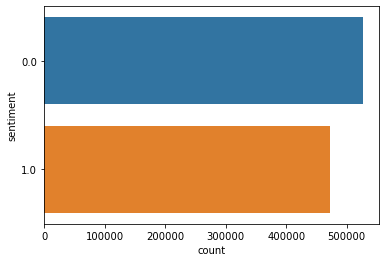

In [237]:
sns.countplot(data = text_data, y = 'sentiment')

<AxesSubplot:xlabel='Date'>

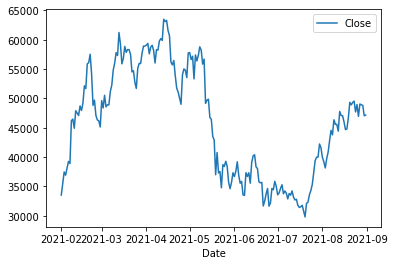

In [121]:
# price of bitcoin from 
price_df.plot(x='Date')

72

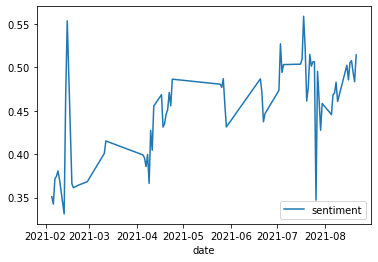

In [112]:
# percent of positive tweets per day
grouped = text_data[['date', 'sentiment']].groupby('date').mean()
grouped.plot()
len(grouped) # only 72 observations (unique days with tweets)

<AxesSubplot:xlabel='date'>

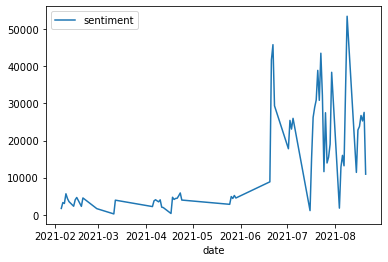

In [250]:
# count of tweets per day

count = text_data[['date', 'sentiment']].groupby('date').count()
count.plot() # seems like activity spikes in the summer

In [ ]:
# tweet length by sentiment

In [ ]:
# bitcoin, eth, doge

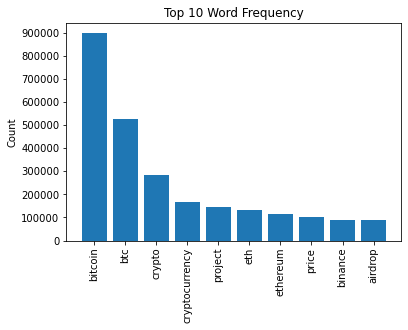

In [236]:

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
sample_freq_dist = FreqDist(text_data["text_without_stopwords"].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency")

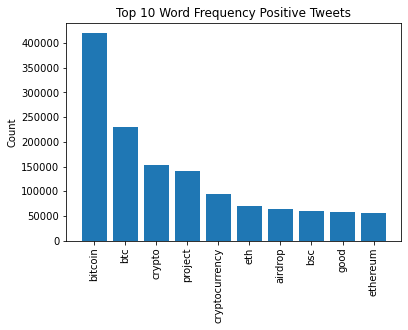

In [239]:
# top 10 word freq for positive tweets  
sample_freq_dist = FreqDist(text_data["text_without_stopwords"][text_data['sentiment']==1].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency Positive Tweets")

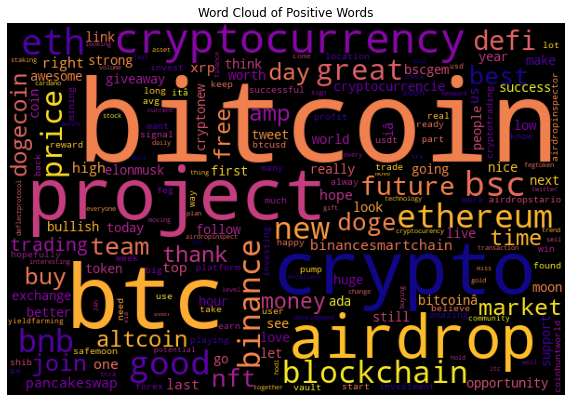

In [249]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join(text_data["text_without_stopwords"][text_data['sentiment']==1].explode())) 
                    #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #set figure size
plt.imshow(wordcloud) #shows wordcloud
plt.axis('off') #sets axis
plt.title('Word Cloud of Positive Tweets'); #plot title

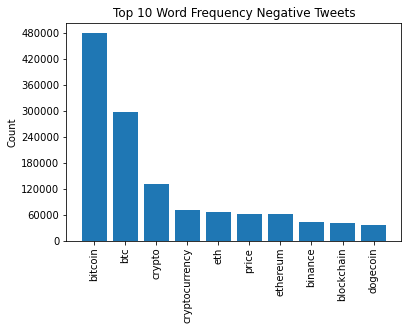

In [240]:
# top 10 word freq for positive tweets  
sample_freq_dist = FreqDist(text_data["text_without_stopwords"][text_data['sentiment']==0].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency Negative Tweets")

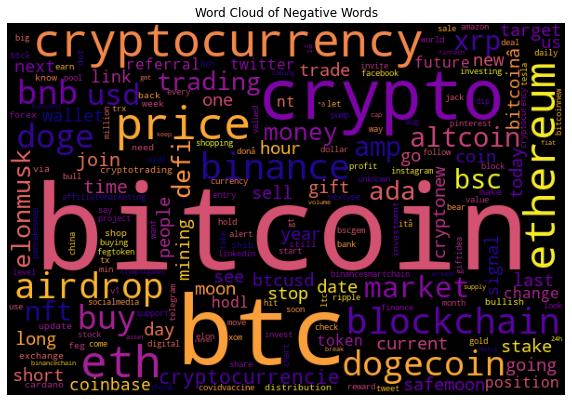

In [248]:
wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, width = 600, height = 400, 
                       background_color = 'black', colormap = 'plasma') #Make wordcloud
wordcloud.generate(",".join(text_data["text_without_stopwords"][text_data['sentiment']==0].explode())) 
                    #Generates wordcloud from input list

plt.figure(figsize = (10, 10), facecolor = None) #set figure size
plt.imshow(wordcloud) #shows wordcloud
plt.axis('off') #sets axis
plt.title('Word Cloud of Negative Tweets'); #plot title

In [238]:
# most common hashtags

ListOfHashtags = text_data['hashtag'].to_list() #Converting hashtags to list
RawHashBag = ','.join(map(str, ListOfHashtags)) #Converting list to bag of words
RawHashTokens = word_tokenize(RawHashBag) #Tokenize bag of words

hashstops = (list(string.punctuation) + ['“','”','...',"''",'’','``',"'",',','#','[',']']) #New hashstops

def remove_hashstops(bag, stopwords = hashstops): #Defining new stopword removal function
    stops_removed = [word.lower() for word in bag if word.lower() not in stopwords] #Remove if in list
    return stops_removed #Return lowercase word if not in list

CleanHashTokens = remove_hashstops(RawHashTokens) #Remove hashstops from list of cleaned hashtag tokens

frequency = FreqDist(CleanHashTokens) #Setting frequency to CleanHashTokens
frequency.most_common(25) #Looking at 25 most common tokens

[('bitcoin', 794774),
 ('btc', 387515),
 ('crypto', 216500),
 ('cryptocurrency', 152141),
 ('ethereum', 104335),
 ('eth', 99088),
 ('bsc', 77311),
 ('bnb', 77038),
 ('airdrop', 75359),
 ('blockchain', 74450),
 ('binance', 71522),
 ('dogecoin', 53182),
 ('defi', 50063),
 ('doge', 46238),
 ('airdrops', 44098),
 ('xrp', 31965),
 ('cryptocurrencies', 31870),
 ('binancesmartchain', 29404),
 ('nft', 29173),
 ('bitcoinâ', 27928),
 ('cryptonews', 26363),
 ('altcoin', 25266),
 ('trading', 23302),
 ('ada', 22369),
 ('pancakeswap', 19873)]

### Functions

In [323]:
''' 
Function that stores relevant scoring metrics
'''

def return_scores(y_train, y_hat_train, y_test, y_hat_test):
    r_train = recall_score(y_train, y_hat_train)
    r_test = recall_score(y_test, y_hat_test)
         
    f1_train = f1_score(y_train, y_hat_train)
    f1_test = f1_score(y_test, y_hat_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    pr_auc = average_precision_score(y_test, y_hat_test)
    
    ac_train = accuracy_score(y_train, y_hat_train)
    ac_test = accuracy_score(y_test, y_hat_test)
    
    return r_train, r_test, f1_train, f1_test, ac_train, ac_test, roc_auc, pr_auc

In [331]:
'''
Creates a data frame with various scores for each model
'''
# column names
scores = pd.DataFrame(columns = ['recall_train', 'recall_test', 'f1_train', 
                                 'f1_test', 'accuracy_train', 'accuracy_test', 
                                 'roc_auc', 'pr_auc', 'params'])
    

def scoreTable(model, model_name, y_train, y_hat_train, y_test, y_hat_test):
    

    # storing scores
    r_train, r_test, f1_train, f1_test, ac_train, ac_test, roc_auc, pr_auc = \
    return_scores(y_train, y_hat_train, y_test, y_hat_test)
    
    # list of scores
    score_list = []
    score_list.extend((r_train, r_test, f1_train, f1_test, 
                       ac_train, ac_test, roc_auc, pr_auc, str(model)))
    
    # adding scores to score table
    scores.loc[model_name] = score_list
    return scores

### Train Test Split

In [295]:
text_data.head()

,text,date,sentiment,is_retweet,text_tokenized,text_without_stopwords,hashtag,text_without_abbv,text2
0,blue ridge bank shares halted by nyse after #b...,2021-02-10,0.0,False,"[blue, ridge, bank, shares, halted, by, nyse, ...","[blue, ridge, bank, shares, halted, nyse, bitc...",[#bitcoin],"[blue, ridge, bank, shares, halted, nyse, bitc...",blue ridge bank shares halted by nyse after bi...
1,"ð today, that's this #thursday, we will do ...",2021-02-10,0.0,False,"[today, that, this, thursday, we, will, do, ta...","[today, thursday, take, friend, btc, wallet, s...","[#thursday, #btc, #wallet, #security]","[today, thursday, take, friend, bitcoin, walle...",today that this thursday we will do take with ...
2,"guys evening, i have read this article about b...",2021-02-10,0.0,False,"[guys, evening, have, read, this, article, abo...","[guys, evening, read, article, btc, would, lik...",[],"[guys, evening, read, article, bitcoin, would,...",guys evening have read this article about bitc...
3,$btc a big chance in a billion! price: \. (// ...,2021-02-10,0.0,False,"[btc, big, chance, in, billion, price, bitcoin...","[btc, big, chance, billion, price, bitcoin, fx...","[#bitcoin, #fx, #btc, #crypto]","[bitcoin, big, chance, billion, price, bitcoin...",bitcoin big chance in billion price bitcoin fx...
4,this network is secured by nodes as of today...,2021-02-10,0.0,False,"[this, network, is, secured, by, nodes, as, of...","[network, secured, nodes, today, soon, biggest...",[#btc],"[network, secured, nodes, today, soon, biggest...",this network is secured by nodes as of today s...


In [310]:
X = text_data.drop('sentiment', axis=1)
y = text_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [297]:
print(y_train.value_counts(normalize=True)) #fairly balanced
print(y_test.value_counts(normalize=True))

0.0    0.527191
1.0    0.472809
Name: sentiment, dtype: float64
0.0    0.526648
1.0    0.473352
Name: sentiment, dtype: float64


#### Models

In [298]:
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit(X_train['text2']).transform(X_train['text2']) # run on non-tokenized text

# Visually inspect the 10 most common words
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,and,bitcoin,cryptocurrency,for,in,is,of,the,this,to
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.687686,0.509447,0.000000,0.000000,0.517255,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.499673,0.000000,0.000000,0.000000,0.563756,0.000000,0.000000,0.657652,0.000000
3,0.000000,0.543758,0.000000,0.000000,0.000000,0.000000,0.671101,0.503935,0.000000,0.000000
4,0.250552,0.111536,0.000000,0.000000,0.263255,0.251682,0.275314,0.413471,0.587201,0.447858
...,...,...,...,...,...,...,...,...,...,...
749980,0.468236,0.625323,0.463248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.418483
749981,0.000000,0.000000,0.000000,0.808723,0.000000,0.000000,0.000000,0.588190,0.000000,0.000000
749982,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
749983,0.000000,0.220543,0.490144,0.000000,0.000000,0.497656,0.544385,0.408783,0.000000,0.000000


In [299]:
# We should still have the same number of rows
assert X_train_vectorized.shape[0] == X_train.shape[0]

# The vectorized version should have 10 columns, since we set
# max_features=10
assert X_train_vectorized.shape[1] == 10

In [300]:
# Import relevant class and function
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.63176597, 0.63029927, 0.63047928, 0.63069928, 0.63141263])

In [301]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [ ]:
# number of sentences - do i need this? maybe we just do number of words?
#from nltk.tokenize import sent_tokenize
#X_train["num_sentences"] = X_train["text"].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
# what about contains a price? or contains a hashtag? or is a retweet?
# contains emoticon?
# ngrams?

In [311]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stopwords_list,
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train['text2'])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,airdrop,binance,bitcoin,blockchain,bnb,crypto,doge,eth,price,project
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.468983,0.509813,0.0,0.608975,0.000000,0.386386,0.0,0.000000
2,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.242872,0.000000,0.0,0.000000,0.762012,0.600292,0.0,0.000000
4,0.715429,0.0,0.213228,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.665353
...,...,...,...,...,...,...,...,...,...,...
749980,0.000000,0.0,0.610152,0.000000,0.0,0.792284,0.000000,0.000000,0.0,0.000000
749981,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
749982,0.778708,0.0,0.116044,0.000000,0.0,0.226025,0.000000,0.573638,0.0,0.000000
749983,0.000000,0.0,0.193130,0.629832,0.0,0.752338,0.000000,0.000000,0.0,0.000000


In [312]:
# Instantiate a MultinomialNB classifier
model_1 = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
model_1_cv = cross_val_score(model_1, X_train_vectorized, y_train)
model_1_cv

array([0.60387208, 0.60453876, 0.60488543, 0.60501877, 0.60291873])

In [ ]:
# new features
# contains hastag, emoticon
# contains certain words?
# other ideas??

In [ ]:
# word2vec

In [313]:


X_train_tokenized = X_train['text2'].map(word_tokenize)
model_wv = Word2Vec(X_train_tokenized, size=100, window=5, min_count=1, workers=4)
model_wv.train(X_train_tokenized, total_examples=model_wv.corpus_count, epochs=10)
wv = model_wv.wv

model_wv_cv = cross_val_score(model_wv, wv, y_train)
model_wv_cv

array([0.60387208, 0.60453876, 0.60488543, 0.60501877, 0.60291873])

In [338]:
X_train_tokenized = X_train['text2'].map(word_tokenize)
total_vocabulary = set(word for row in X_train_tokenized for word in row)
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 184790 unique tokens in the dataset.


In [339]:
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [319]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [320]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])

models = [('Random Forest', rf)]

scores = [(name, cross_val_score(model, X_train_tokenized, y_train, cv=2).mean()) \
          for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.3s finished


In [321]:
scores

[('Random Forest', 0.7643725286649151)]

In [326]:
# prep pipeline


pipe1 = Pipeline([
    ('Vector', TfidfVectorizer(max_features=10,stop_words=stopwords_list)), 
    ('Classifier', LogisticRegression(random_state=42)), 
]) #Creating Logistic Regression pipeline with Tfidf vectorizer

pipe1.fit(X_train['text2'], y_train)

y_hat_train = pipe1.predict(X_train['text2'])
y_hat_test = pipe1.predict(X_test['text2'])

display(scoreTable(pipe1, 'tdidf_lr', y_train, y_hat_train, y_test, y_hat_test))
display(cross_val_score(pipe1, X_train['text2'], y_train))

array([0.62022574, 0.62090575, 0.6216191 , 0.61943906, 0.62012574])

In [329]:
#scoreTable(pipe1, 'tdidf_lr', y_train, y_hat_train, y_test, y_hat_test)

,recall_train,recall_test,f1_train,f1_test,accuracy_train,accuracy_test,roc_auc,pr_auc,params
tdidf_lr,0.348017,0.349082,0.464255,0.465606,0.620232,0.620698,0.606954,0.552085,"Pipeline(steps=[('Vector',\n T..."


In [335]:
pipe2 = Pipeline([
    ('Vector', TfidfVectorizer(max_features=50,stop_words=stopwords_list)), 
    ('Classifier', LogisticRegression(random_state=42, solver='lbfgs', 
                                      C=1e12, penalty='l2')), 
]) #Creating Logistic Regression pipeline with Tfidf vectorizer

pipe2.fit(X_train['text2'], y_train)

y_hat_train = pipe2.predict(X_train['text2'])
y_hat_test = pipe2.predict(X_test['text2'])

display(scoreTable(pipe2, 'tdidf_lr2', y_train, y_hat_train, y_test, y_hat_test))

/Users/natalyadoris/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,recall_train,recall_test,f1_train,f1_test,accuracy_train,accuracy_test,roc_auc,pr_auc,params
tdidf_lr2,0.508835,0.510935,0.638865,0.640766,0.728009,0.72882,0.717795,0.670421,"Pipeline(steps=[('Vector',\n T..."


In [343]:
# 30min runtime
pipe3 = Pipeline([
    ('Vector', TfidfVectorizer(max_features=50,stop_words=stopwords_list)), 
    ('Classifier', RandomForestClassifier(random_state=42, n_estimators=100, 
                                          verbose=True)), 
]) #Creating Logistic Regression pipeline with Tfidf vectorizer

pipe3.fit(X_train['text2'], y_train)

y_hat_train = pipe3.predict(X_train['text2'])
y_hat_test = pipe3.predict(X_test['text2'])

display(scoreTable(pipe3, 'tdidf_rf', y_train, y_hat_train, y_test, y_hat_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 33.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished


,recall_train,recall_test,f1_train,f1_test,accuracy_train,accuracy_test,roc_auc,pr_auc,params
tdidf_lr2,0.508835,0.510935,0.638865,0.640766,0.728009,0.728820,0.717795,0.670421,"Pipeline(steps=[('Vector',\n T..."
w2v_rf,0.000000,0.000000,0.000000,0.000000,0.527191,0.526648,0.500000,0.473352,"Pipeline(steps=[('Word2Vec Vectorizer',\n ..."
w2v_lr,0.000000,0.000000,0.000000,0.000000,0.527191,0.526648,0.500000,0.473352,"Pipeline(steps=[('Word2Vec Vectorizer',\n ..."
tdidf_rf,0.665423,0.617851,0.777268,0.726314,0.819687,0.779592,0.771408,0.725196,"Pipeline(steps=[('Vector',\n T..."


In [ ]:
## deal with these later - super long runtime / not sure which X_train
## to use

# random forest is likely causing long runtime

In [342]:
w2v_rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                    ('Random Forest', RandomForestClassifier(random_state=42, 
                                                             n_estimators=100, 
                                                             verbose=True))])

w2v_rf.fit(X_train_tokenized, y_train)

y_hat_train = w2v_rf.predict(X_train_tokenized)
y_hat_test = w2v_rf.predict(X_test['text2']) # do I need to tokenize??

display(scoreTable(w2v_rf, 'w2v_rf', y_train, y_hat_train, y_test, y_hat_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [340]:
w2v_lr =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                    ('Logistic Regression', LogisticRegression(random_state=42, 
                                                               solver='lbfgs', 
                                                               C=1e12, penalty='l2'))])

w2v_lr.fit(X_train_tokenized, y_train)

y_hat_train = w2v_lr.predict(X_train['text2'])
y_hat_test = w2v_lr.predict(X_test['text2'])

display(scoreTable(w2v_lr, 'w2v_lr', y_train, y_hat_train, y_test, y_hat_test))

,recall_train,recall_test,f1_train,f1_test,accuracy_train,accuracy_test,roc_auc,pr_auc,params
tdidf_lr2,0.508835,0.510935,0.638865,0.640766,0.728009,0.728820,0.717795,0.670421,"Pipeline(steps=[('Vector',\n T..."
w2v_rf,0.000000,0.000000,0.000000,0.000000,0.527191,0.526648,0.500000,0.473352,"Pipeline(steps=[('Word2Vec Vectorizer',\n ..."
w2v_lr,0.000000,0.000000,0.000000,0.000000,0.527191,0.526648,0.500000,0.473352,"Pipeline(steps=[('Word2Vec Vectorizer',\n ..."
